In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a time range at 15 minute intervals for one day
datetime_range = pd.date_range(start='2023-02-01 00:00:00', end='2023-02-10 23:45:00', freq='15min')

# Create a dictionary to store the columns
columns = {'Datetime': datetime_range}

# Create a DataFrame
columns['Residual_BLER_DL'] = np.random.choice([0, np.random.uniform(1, 40)], size=len(datetime_range), p=[0.98, 0.02])
columns['Residual_BLER_UL'] = np.random.choice([0, np.random.uniform(1, 12)], size=len(datetime_range), p=[0.98, 0.02])

# Create a DataFrame with the time series column and the additional value columns
df = pd.DataFrame(columns)
df.head(1)

,Datetime,Residual_BLER_DL,Residual_BLER_UL
0,2023-02-01,0.0,0.0


In [2]:
df['Datetime'] = df['Datetime'].dt.strftime('%Y-%m-%d %H:%M')
df.insert(1, 'Time', df['Datetime'].str.split(' ', expand=True)[1])
df.insert(1, 'Date', df['Datetime'].str.split(' ', expand=True)[0])

In [3]:
df.head(1)

,Datetime,Date,Time,Residual_BLER_DL,Residual_BLER_UL
0,2023-02-01 00:00,2023-02-01,00:00,0.0,0.0


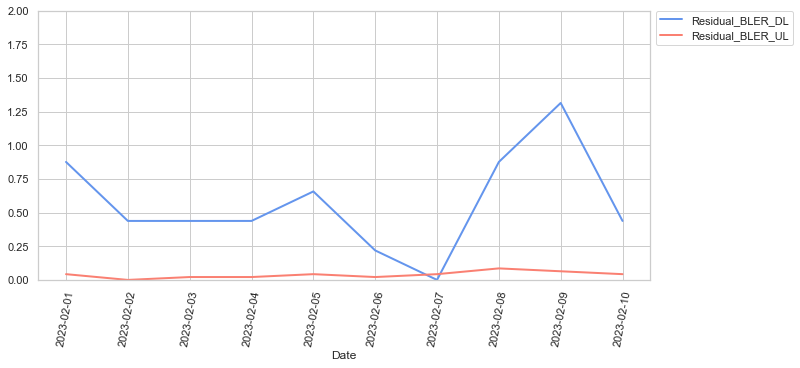

----- 0.21 seconds in total -----


In [4]:
plt.set_loglevel('WARNING') 
sns.set(style='whitegrid')
sns.set_palette(sns.color_palette(['cornflowerblue', 'salmon']))

start_time = time.time()

fig, ax = plt.subplots(figsize=(11, 5),constrained_layout=True)

sns.lineplot(ax=ax, data=df, x='Date', y='Residual_BLER_DL', estimator=np.mean, lw=2, ci=None)
sns.lineplot(ax=ax, data=df, x='Date', y='Residual_BLER_UL', estimator=np.mean, lw=2, ci=None)

ax.legend(labels=['Residual_BLER_DL', 'Residual_BLER_UL'], bbox_to_anchor=(1, 1.02), loc=2)
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params('x', labelrotation=80)
plt.ylabel('')
ax.set_ylim(0, 2.0)
ax.set_yticks(np.arange(0, 2.1, step=0.25)) 
plt.show()
print('----- %s seconds in total -----' % round((time.time() - start_time), 2))

In [5]:
df['Datetime'].nunique()

960

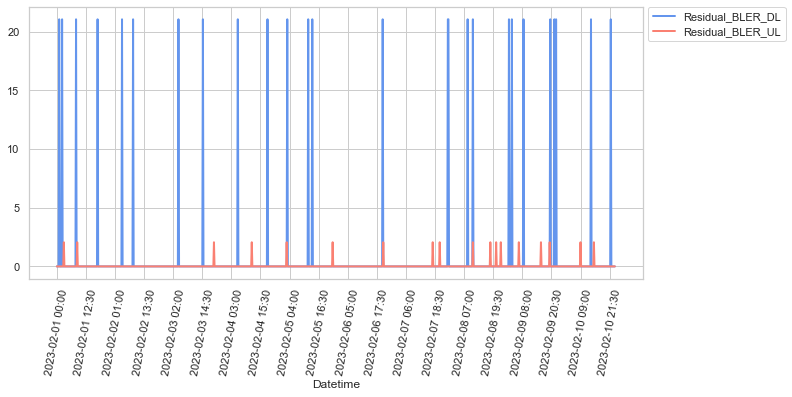

----- 1.4 seconds in total -----


In [6]:
plt.set_loglevel('WARNING') 
sns.set(style='whitegrid')
sns.set_palette(sns.color_palette(['cornflowerblue', 'salmon']))

start_time = time.time()

fig, ax = plt.subplots(figsize=(11, 5))

sns.lineplot(ax=ax, data=df, x='Datetime', y='Residual_BLER_DL', estimator=np.mean, lw=2, ci=None)
sns.lineplot(ax=ax, data=df, x='Datetime', y='Residual_BLER_UL', estimator=np.mean, lw=2, ci=None)

ax.legend(labels=['Residual_BLER_DL', 'Residual_BLER_UL'], bbox_to_anchor=(1, 1.02), loc=2)
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params('x', labelrotation=80)
plt.ylabel('')
#ax.set_ylim(0, 2.0)
#ax.set_yticks(np.arange(0, 2.1, step=0.25)) 
ax.set_xticks(np.arange(0, 970, step=50)) 
plt.show()
print('----- %s seconds in total -----' % round((time.time() - start_time), 2))